<a href="https://colab.research.google.com/github/Kachanta/DSFP/blob/main/WorldPOPulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WORLD POPULATION ANALYSIS**
ANALYSIS WORKFLOW:
1. Data Extraction and Webscraping
2. Data Cleaning
3. Exploratory Data Analysis
  1. identify countries with high population & low population
  2. identify the population growth rates
  3. identify sources of the population information
  4. identify countries with the most upto date data



In [2]:
# Importing relevant packages
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd
import urllib.request as urequest
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Extraction (Webscraping)

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"

In [4]:
request = urequest.Request(url)

In [5]:
response = urequest.urlopen(request)

In [6]:
pop_data = response.read()
#print(pop_data)

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of countries and dependencies by population - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-fea

In [7]:
page = soup(pop_data, "html.parser")

In [55]:
#print(page)

In [9]:
data =page.find_all(class_='wikitable')
# data=page.find_all('class':'wikitable')

#conver the first table to dataframe
if data:
    table =data[0] #Acess the first table
    df_raw=pd.read_html(str(table))

<ipython-input-9-042cc80e3e36>:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_raw=pd.read_html(str(table))


In [10]:
type(df_raw)

list

In [11]:
import numpy as np
df_raw=np.array(df_raw)

In [12]:
df = df_raw.copy()

In [13]:
df=pd.DataFrame(df.reshape(-1,7))


# Data Cleaning

In [14]:
df.head()

,0,1,2,3,4,5,6
0,–,World,8119000000,100%,1 Jul 2024,UN projection[1][3],NaN
1,1/2 [b],China,1409670000,17.3%,31 Dec 2023,Official estimate[5],[c]
2,1/2 [b],India,1404910000,17.2%,1 Jul 2024,Official projection[6],[d]
3,3,United States,340110988,4.2%,1 Jul 2024,Official estimate[7],[e]
4,4,Indonesia,282477584,3.5%,30 Jun 2024,National annual projection[8],NaN


In [15]:
# Dropping some columns not relevant to our objective
df.drop(columns = [0,6],axis=0,inplace=True)

In [16]:
df.shape

(240, 5)

In [17]:
# Renaming the Column headers
cols = ["lacation","population","% of world","date","source"]
df.columns =cols

In [18]:
df.head()

,lacation,population,% of world,date,source
0,World,8119000000,100%,1 Jul 2024,UN projection[1][3]
1,China,1409670000,17.3%,31 Dec 2023,Official estimate[5]
2,India,1404910000,17.2%,1 Jul 2024,Official projection[6]
3,United States,340110988,4.2%,1 Jul 2024,Official estimate[7]
4,Indonesia,282477584,3.5%,30 Jun 2024,National annual projection[8]


In [19]:
# checking for null values
df.isnull().sum()

,0
lacation,0
population,0
% of world,0
date,0
source,0


In [20]:
#checking of duplicates
df.duplicated().sum()

0

In [21]:
df['source'].nunique()

234

In [22]:
df['source'].unique()

array(['UN projection[1][3]', 'Official estimate[5]',
       'Official projection[6]', 'Official estimate[7]',
       'National annual projection[8]', '2023 census result[9]',
       'Official projection[10]', '2022 census result[11]',
       '2022 census result[12]', 'Official estimate[13]',
       'National quarterly estimate[14]', 'Monthly national estimate[15]',
       'Official projection[16]', 'National annual projection[17]',
       'Official estimate[18]', 'UN estimate[19]',
       'Official estimate[20]', 'Official estimate[21]',
       'Official estimate[22]', 'National quarterly estimate[23]',
       'Monthly national estimate[24]', 'Official estimate[25]',
       'Monthly national estimate[26]', 'Official estimate[27]',
       '2022 census result[28]', 'Monthly national estimate[29]',
       'National annual projection[30]', 'Official projection[31]',
       'Official projection[32]', 'Monthly national estimate[33]',
       'UN projection[34]', 'National quarterly estimate[

In [23]:
import re

In [24]:
# Removing all the extentions in the sources filed
def remove_brackets_content(text):
  return re.sub(r"\[.*?\]", "", text)

df['source'] = df['source'].apply(remove_brackets_content)

In [25]:
df.head()

,lacation,population,% of world,date,source
0,World,8119000000,100%,1 Jul 2024,UN projection
1,China,1409670000,17.3%,31 Dec 2023,Official estimate
2,India,1404910000,17.2%,1 Jul 2024,Official projection
3,United States,340110988,4.2%,1 Jul 2024,Official estimate
4,Indonesia,282477584,3.5%,30 Jun 2024,National annual projection


## EXPLORATORY DATA ANALYSIS

In [26]:
df = df[df['lacation']!='World']

Text(0.5, 1.0, 'Most Populated')

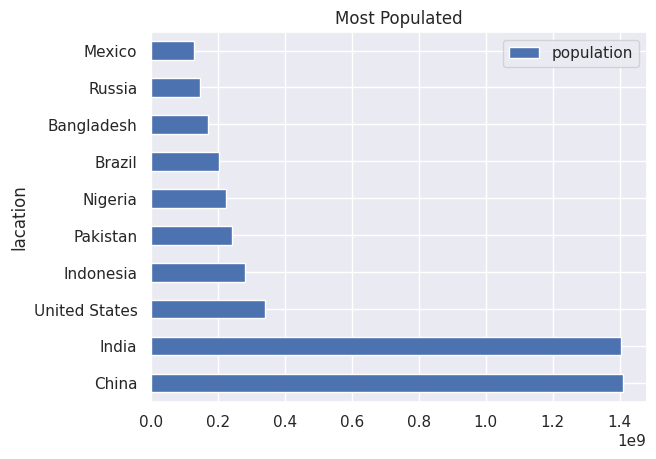

In [27]:
df.head(10).plot(kind='barh',x='lacation',y='population')
plt.title('Most Populated')


Based on the bar chart visualizing the top 10 most populated countries, it is evident that China currently holds the largest population, exceeding 1.4 billion people. India closely follows with a nearly identical population size, also surpassing 1.4 billion. Within this group of the 10 most populous countries, Mexico has the smallest population.

Text(0.5, 1.0, 'least Populated')

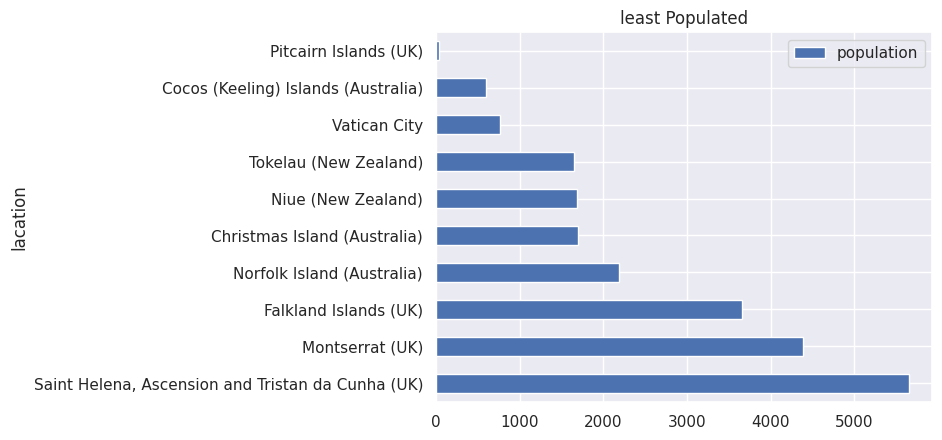

In [28]:
df.tail(10).plot(kind='barh',x='lacation',y='population')
plt.title('least Populated')

Based on the bar chart illustrating the countries with the lowest populations, it is evident that Pitcairn Island, a British Overseas Territory, currently holds the distinction of being the least populated. With a population estimated at approximately 50 people, it represents a stark contrast to the most populous countries.

In [34]:
df.tail()

,lacation,population,% of world,date,source
235,Niue (New Zealand),1681,0%,11 Nov 2022,2022 Census
236,Tokelau (New Zealand),1647,0%,1 Jan 2019,2019 Census
237,Vatican City,764,0%,26 Jun 2023,Official figure
238,Cocos (Keeling) Islands (Australia),593,0%,30 Jun 2020,2021 Census
239,Pitcairn Islands (UK),35,0%,1 Jul 2023,Official estimate


In [32]:
new_data = pd.read_csv('Countries-Continents.csv')

In [33]:
#new_data.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [41]:
df.head()

,lacation,population,% of world,date,source
1,China,1409670000,17.3%,31 Dec 2023,Official estimate
2,India,1404910000,17.2%,1 Jul 2024,Official projection
3,United States,340110988,4.2%,1 Jul 2024,Official estimate
4,Indonesia,282477584,3.5%,30 Jun 2024,National annual projection
5,Pakistan,241499431,3.0%,1 Mar 2023,2023 census result


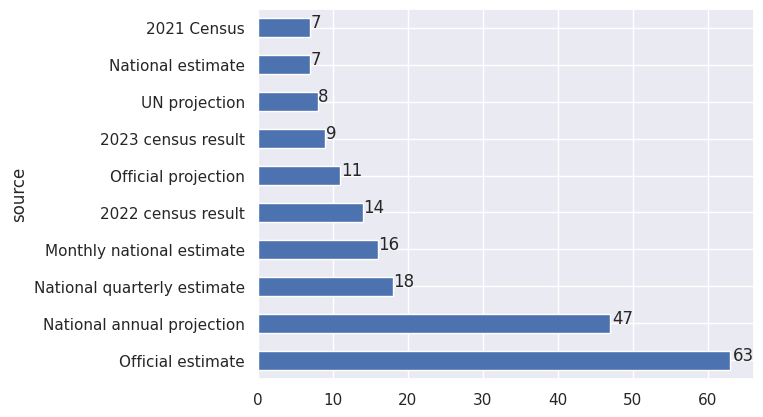

In [54]:
ax = df["source"].value_counts().head(10).plot(kind='barh') # Changed to 'barh'
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() + p.get_height()/2 ))

The horizontal bar chart above illustrates the distribution of the top 10 data sources used in this population analysis. Each bar represents a unique source, and its length corresponds to the number of times that source was cited.

1. It can be observed that official Estimates emerge as the most frequently used data source, indicating a reliance on government or authoritative statistical agencies for population figures. This suggests a high degree of reliability and accuracy in the dataset.
2. National Projections are the second most common source, highlighting the inclusion of data based on demographic trends and forecasts. This adds a forward-looking perspective to the analysis, but it's important to note that projections inherently carry a degree of uncertainty.
3. Census data also appears prominently among the sources, reflecting the use of comprehensive population counts conducted by countries. Census data is generally considered highly reliable, providing a detailed snapshot of population characteristics at a specific point in time.